## Note: This tutorial has been borrowed from the official [PyTorch tutorial](https://https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) page and has been edited/modified to make it relevant to this class.

In [ ]:
%matplotlib inline


# Tensors

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.


In [ ]:
import torch
import numpy as np

## Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays.


In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1549, 0.1400],
        [0.2697, 0.1497]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [ ]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1882, 0.3187, 0.7630],
        [0.3625, 0.6415, 0.5872]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




## Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
[here](https://pytorch.org/docs/stable/torch.html)_.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type.




In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

A more compact way to figure out device is

In [ ]:
# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplying tensors**



In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors



In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**
Operations that have a ``_`` suffix are in-place. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>



--------------





## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



### Tensor to NumPy array



In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


To avoid them sharing the same memory use tensor.clone() or numpy_array.copy()

In [ ]:
t2 = t.clone()
print(f"t = {t} \n n = {n} \n t2 = {t2}")
print("======")
t2[4] = 500.
print(f"t = {t} \n n = {n} \n t2 = {t2}")

t = tensor([2., 2., 2., 2., 2.], dtype=torch.float64) 
 n = [2. 2. 2. 2. 2.] 
 t2 = tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
t = tensor([2., 2., 2., 2., 2.], dtype=torch.float64) 
 n = [2. 2. 2. 2. 2.] 
 t2 = tensor([  2.,   2.,   2.,   2., 500.], dtype=torch.float64)



# A Gentle Introduction to ``torch.autograd``

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a conceptual
understanding of how autograd helps a neural network train.



## Usage in PyTorch
Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, and height & width of 64,
and its corresponding ``label`` initialized to some random values. Label in pretrained models has
shape (1,1000).

<div class="alert alert-info"><h4>Note</h4><p>This tutorial work only on CPU and will not work on GPU (even if tensor are moved to CUDA).</p></div>


In [ ]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Next, we run the input data through the model through each of its layers to make a prediction.
This is the **forward pass**.

In [ ]:
prediction = model(data) # forward pass

We use the model's prediction and the corresponding label to calculate the error (``loss``).
The next step is to backpropagate this error through the network.
Backward propagation is kicked off when we call ``.backward()`` on the error tensor.
Autograd then calculates and stores the gradients for each model parameter in the parameter's ``.grad`` attribute.




In [ ]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and [momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d)_ of 0.9.
We register all the parameters of the model in the optimizer.




In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call ``.step()`` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in ``.grad``.




In [ ]:
optim.step() #gradient descent

At this point, you have everything you need to train your neural network.




# Defining a DNN model

Neural networks can be constructed using the ``torch.nn`` package.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

## Define the network

Let’s define this network:


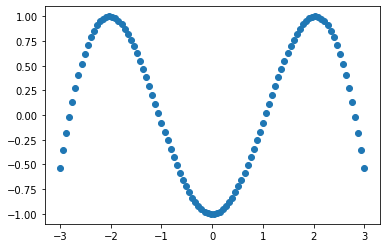

Epoch [100/1000], Loss: 0.029396910220384598
Epoch [200/1000], Loss: 0.005413828883320093
Epoch [300/1000], Loss: 0.0007591159082949162
Epoch [400/1000], Loss: 0.0004892006400041282
Epoch [500/1000], Loss: 0.0003026503254659474
Epoch [600/1000], Loss: 0.00023148210311774164
Epoch [700/1000], Loss: 0.00025426619686186314
Epoch [800/1000], Loss: 0.0001436722814105451
Epoch [900/1000], Loss: 0.00017596856923773885
Epoch [1000/1000], Loss: 0.00010105578985530883


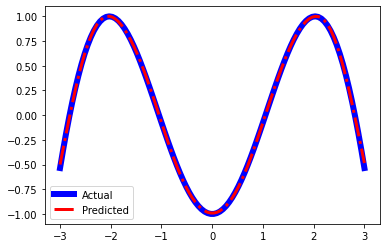

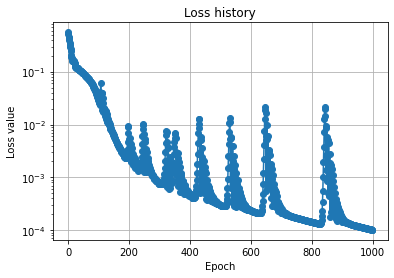

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generating the data
x = np.linspace(-3, 3, 100)
y_ = 3 * x * np.sin(x)
y = ((y_ - y_.min())/(y_.max()-y_.min()))*2 - 1.

# Plotting the data to see how it looks
plt.scatter(x, y)
plt.show()

# Converting numpy arrays to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Defining the model
class DNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer3 = torch.nn.Linear(hidden_size, output_size)
        self.act = torch.nn.Tanh()
    
    def forward(self, x):
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)
        return x

# Initializing the model
model = DNN(input_size=1, hidden_size=32, output_size=1)

# Defining the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Tracking loss
loss_list = []
# Training the model
for epoch in range(1000):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)
    # IMPORTANT: Always remember to detach a tensor from the computation graph if you want to use it outside of the graph
    loss_list.append(loss.detach().numpy())


    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Printing the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item()}')

# Evaluating the model
with torch.no_grad():
    y_pred = model(x)

# Plotting the predictions
plt.figure()
plt.plot(x, y, "b", linewidth=6, label='Actual')
plt.plot(x, y_pred, "-.", linewidth=3, color="red", label='Predicted')
plt.legend()

# plotting the loss function
plt.figure()
plt.semilogy(loss_list, "-o")
plt.title("Loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.grid()

plt.show()


## A note on super()
PyTorch uses class inheritence idea. Specifically one can define custom models by using torch.nn.Module as a parent class and inhereting its attributes and methods.

### Some examples:

In [ ]:
class Vehicle:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

class Car(Vehicle):
    def __init__(self, make, model, year, num_doors):
        super().__init__(make, model, year)            # Calls the parent class's constructor
        self.num_doors = num_doors

    def display_info(self):
        print(f"Make: {self.make}\nModel: {self.model}\nYear: {self.year}\nNumber of doors: {self.num_doors}")      # Uses the parent class's attributes

my_car = Car("Ford", "Mustang", 2021, 2)
my_car.display_info() # Output: Make: Ford \n Model: Mustang \n Year: 2021 \n Number of doors: 2


Make: Ford
Model: Mustang
Year: 2021
Number of doors: 2


In [ ]:
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species

    def speak(self):
        print(f"{self.name} speaks.")

class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name, species="Dog") # Calls the parent class's constructor
        self.breed = breed

    def speak(self):
        super().speak() # Calls the parent class's speak method
        print("Woof!")

my_dog = Dog("Buddy", "Golden Retriever")
print(my_dog.name) 
print(my_dog.species) 
my_dog.speak() 

Buddy
Dog
Buddy speaks.
Woof!
